In [2]:
from collections import defaultdict
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import sys

class NaiveBayesClassifier:
    def __init__(self):
        self.class_word_counts = defaultdict(lambda: defaultdict(int))
        self.class_total_counts = defaultdict(int)
        self.vocabulary = set()

    def fit(self, X_train, y_train, alpha=1):
        # Count occurrences of words in each class
        for document, label in zip(X_train, y_train):
            for word in document:
                self.class_word_counts[label][word] += 1
                self.class_total_counts[label] += 1
                self.vocabulary.add(word)

        # Calculate probabilities with add-1 smoothing
        self.params = {}
        for label in self.class_word_counts:
            self.params[label] = {}
            total_word_count = sum(self.class_word_counts[label].values())
            for word in self.vocabulary:
                word_count = self.class_word_counts[label][word]
                self.params[label][word] = (word_count + alpha) / (total_word_count + alpha * len(self.vocabulary))

    def predict(self, X_test):
        predictions = []
        probabilities = []  # Store probabilities for each class
        for document in X_test:
            scores = {label: np.log(self.prior(label)) for label in self.class_word_counts}
            for word in document:
                for label in self.class_word_counts:
                    if word in self.params[label]:
                        scores[label] += np.log(self.params[label][word])
            # Calculate probabilities from scores
            prob_scores = {label: np.exp(score) for label, score in scores.items()}
            probabilities.append(prob_scores)
            predicted_label = max(scores, key=scores.get)
            predictions.append(predicted_label)
        return predictions, probabilities

    def prior(self, label):
        return self.class_total_counts[label] / sum(self.class_total_counts.values())

if __name__ == "__main__":
    # Check if the correct number of command-line arguments are provided
    if len(sys.argv) != 2:
        #print("Default training size is 80 %")
        input_number = 80;


    # Retrieve the input number from the command-line argument and convert it to float
    if len(sys.argv) > 1:
        try:
            input_number = float(sys.argv[1])
            if not (20 <= input_number <= 80):
                input_number = 80
        except ValueError:
            input_number = 80


    # Print the input number
    print("Abrar Ahmed, Mohammed, A20540340 solution:")
    print("Training size:", input_number,"%")
    # Load the data
    data = pd.read_csv("stock_data.csv")

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Preprocess the data
    data['Text'] = data['Text'].str.replace('[^\w\s]', '')  # Remove special characters
    data['Text'] = data['Text'].str.lower()  # Convert to lowercase

    # Split the data into training and testing sets
    TRAIN_SIZE = input_number / 100
    #X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=1-TRAIN_SIZE, random_state=42)

    total_samples = len(data)
    #TRAIN_SIZE_PERCENT = 0.8  # 80% of samples for training
    train_size = int(total_samples * TRAIN_SIZE)
    test_size = int(total_samples * 0.8)
    # Split the data into training and test sets
    train_set = data[:train_size]
    test_set = data[test_size:]

    # Train-test split for text and sentiment columns
    X_train, X_test = train_set['Text'], test_set['Text']
    y_train, y_test = train_set['Sentiment'], test_set['Sentiment']


    # Train the Naive Bayes classifier
    classifier = NaiveBayesClassifier()
    classifier.fit(X_train.str.split(), y_train)  # Convert text to list of words before fitting
    print("Training classifier…")
    print("Testing classifier…")
    # Predict on the test set
    predictions, probabilities = classifier.predict(X_test.str.split())  # Convert text to list of words before predicting


    # Calculate metrics
    conf_matrix = confusion_matrix(y_test, predictions)
    tp, tn, fp, fn = conf_matrix[1, 1], conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0]
    sensitivity = recall_score(y_test, predictions)
    specificity = tn / (tn + fp)
    precision = precision_score(y_test, predictions)
    neg_pred_value = tn / (tn + fn)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Print test results
    print("Test results / metrics:")
    print("Number of true positives:", tp)
    print("Number of true negatives:", tn)
    print("Number of false positives:", fp)
    print("Number of false negatives:", fn)
    print("Sensitivity (recall):", sensitivity)
    print("Specificity:", specificity)
    print("Precision:", precision)
    print("Negative predictive value:", neg_pred_value)
    print("Accuracy:", accuracy)
    print("F-score:", f1)
    print()


    # Classification of user input
    while True:
        print("Enter your sentence:")
        input_sentence = input("Sentence S: ")

        # Classify the input sentence
        input_tokenized = input_sentence.lower().replace('[^\w\s]', '').split()
        predicted_sentiment, predicted_probabilities = classifier.predict([input_tokenized])


        # Print the predicted sentiment and probabilities
        print("Predicted Sentiment:", predicted_sentiment[0])
        print("Probabilities:", predicted_probabilities[0])


        # Store probabilities in variables
        positive_probability = predicted_probabilities[0][1]
        negative_probability = predicted_probabilities[0][-1]

        print("Positive Probability:", positive_probability)
        print("Negative Probability:", negative_probability)



        print("was classified as :", predicted_sentiment[0])

        print("P(positive / 1 | %s ) = " % (input_sentence),positive_probability)
        print("P(negative / -1 | %s ) = " % (input_sentence),negative_probability)
        choice = input("Do you want to enter another sentence [Y/N]? ")
        if choice.upper() != 'Y':
            break

C:\Users\mohda\AppData\Local\Temp\ipykernel_25108\2221538871.py:77: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]', '')  # Remove special characters


Abrar Ahmed, Mohammed, A20540340 solution:
Training size: 80 %
Training classifier…
Testing classifier…
Test results / metrics:
Number of true positives: 460
Number of true negatives: 242
Number of false positives: 366
Number of false negatives: 91
Sensitivity (recall): 0.8348457350272233
Specificity: 0.3980263157894737
Precision: 0.5569007263922519
Negative predictive value: 0.7267267267267268
Accuracy: 0.6056945642795514
F-score: 0.6681190994916486

Enter your sentence:
Sentence S: the stock market price prediction is gone rise
Predicted Sentiment: 1
Probabilities: {1: 2.220822829643842e-25, -1: 2.6614996349727446e-26}
Positive Probability: 2.220822829643842e-25
Negative Probability: 2.6614996349727446e-26
was classified as : 1
P(positive / 1 | the stock market price prediction is gone rise ) =  2.220822829643842e-25
P(negative / -1 | the stock market price prediction is gone rise ) =  2.6614996349727446e-26
Do you want to enter another sentence [Y/N]? N


In [3]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

          -1       0.73      0.40      0.51       608
           1       0.56      0.83      0.67       551

    accuracy                           0.61      1159
   macro avg       0.64      0.62      0.59      1159
weighted avg       0.65      0.61      0.59      1159


Confusion Matrix:
[[242 366]
 [ 91 460]]


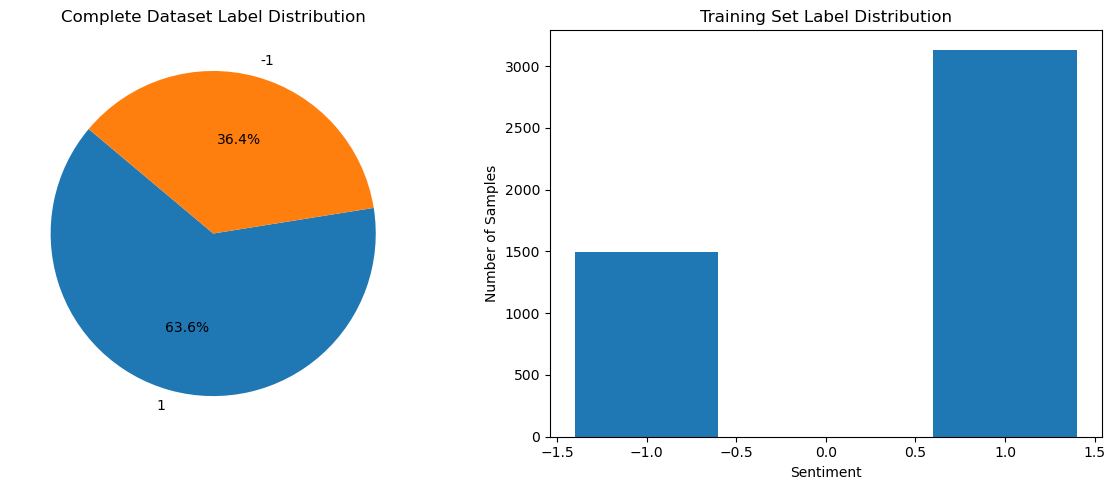

In [4]:
import matplotlib.pyplot as plt

# Label distribution in the complete dataset
label_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Complete Dataset Label Distribution')




# Label distribution in the training set
train_label_counts = y_train.value_counts()
plt.subplot(1, 2, 2)
plt.bar(train_label_counts.index, train_label_counts.values)
plt.title('Training Set Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()

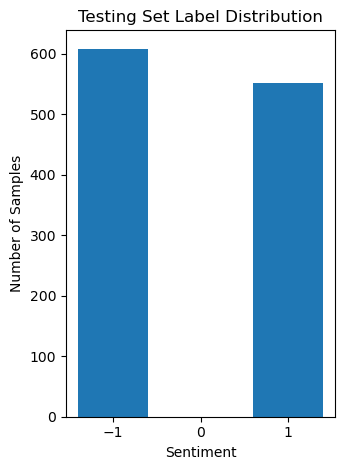

In [5]:
# Label distribution in the testing set
train_label_counts = y_test.value_counts()
plt.subplot(1, 2, 2)
plt.bar(train_label_counts.index, train_label_counts.values)
plt.title('Testing Set Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()

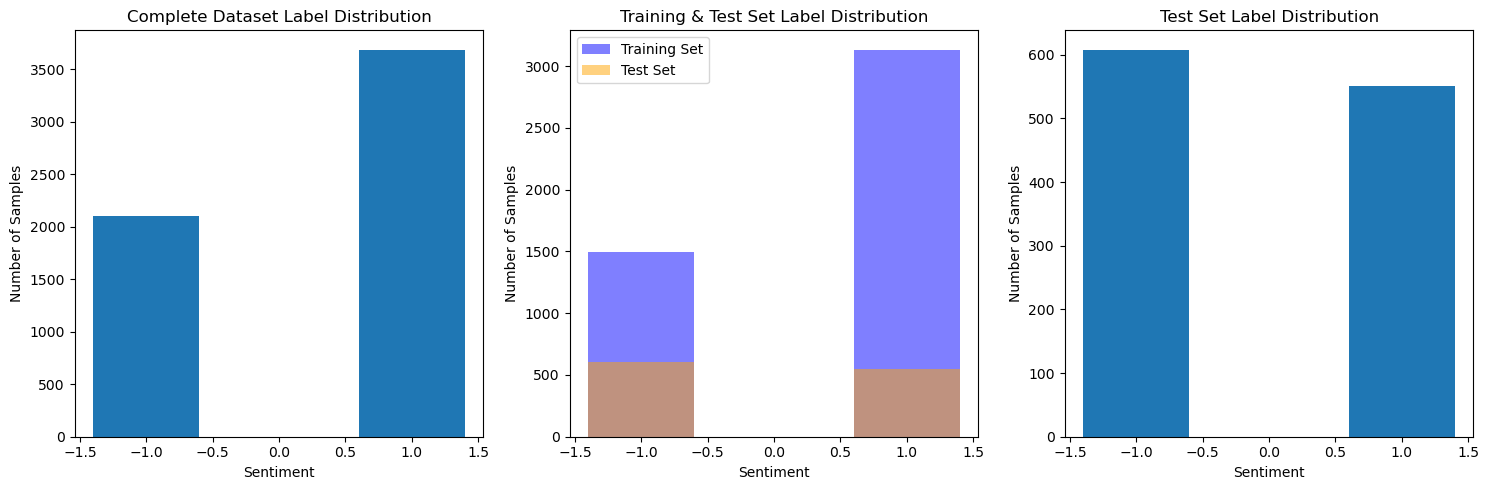

In [6]:
import matplotlib.pyplot as plt

# Complete dataset label distribution
complete_label_counts = data['Sentiment'].value_counts()
complete_label_percentages = complete_label_counts / len(data) * 100

# Training set label distribution
train_label_counts = y_train.value_counts()
train_label_percentages = train_label_counts / len(y_train) * 100

# Test set label distribution
test_label_counts = y_test.value_counts()
test_label_percentages = test_label_counts / len(y_test) * 100

# Plotting
plt.figure(figsize=(15, 5))

# Complete dataset label breakdown chart
plt.subplot(1, 3, 1)
plt.bar(complete_label_counts.index, complete_label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.title('Complete Dataset Label Distribution')

# Training set label breakdown plot
plt.subplot(1, 3, 2)
plt.bar(train_label_counts.index, train_label_counts.values, color='blue', alpha=0.5, label='Training Set')
plt.bar(test_label_counts.index, test_label_counts.values, color='orange', alpha=0.5, label='Test Set')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.title('Training & Test Set Label Distribution')
plt.legend()

# Test set label breakdown plot
plt.subplot(1, 3, 3)
plt.bar(test_label_counts.index, test_label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.title('Test Set Label Distribution')

plt.tight_layout()
plt.show()

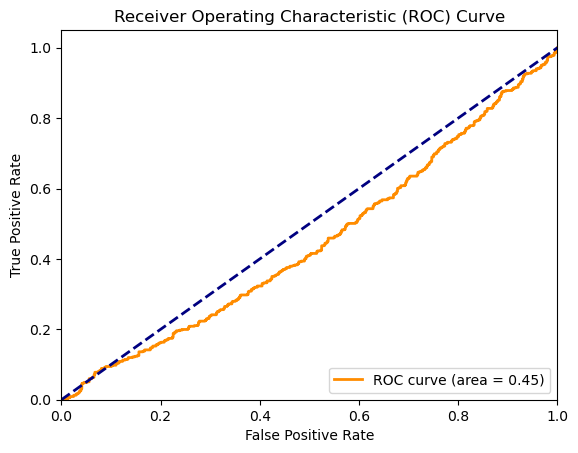

Confusion Matrix:
[[242 366]
 [ 91 460]]


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract positive class probabilities from the list of dictionaries
positive_probabilities = [prob_dict[1] for prob_dict in probabilities]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, positive_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


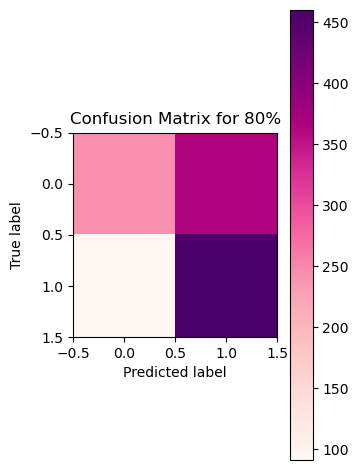

In [8]:
import matplotlib.pyplot as plt

# Plot confusion matrix with changed color
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.RdPu)  # Change the colormap to RdPu
plt.title('Confusion Matrix for 80%')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()
